# 34. FUZZYX: MORE CLUSTERING MODELS
---

## 1. Introducing the Data
We continue to work on `fuzzyx` dataset but we added the predicted labels from the previous chapter with the KMeans clustering model for both k=4 and k=5. We will compare the models' predictions to get important insights

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

fuzzyx = pd.read_csv('data/fuzzyx_df')
print(fuzzyx.shape)
fuzzyx.head()

(1000, 5)


,col1,col2,labels,kmeans4,kmeans5
0,-0.002,-0.035,4,0,2
1,-0.064,0.056,4,0,2
2,-0.060,0.003,4,0,2
3,0.093,0.009,4,0,2
4,0.080,-0.097,4,0,2


In [2]:
fuzzyx.nunique()

col1       1000
col2        996
labels        4
kmeans4       4
kmeans5       5
dtype: int64

## 2. Agglomerative Clustering
#### i. k=4

In [5]:
from sklearn.cluster import AgglomerativeClustering

X = fuzzyx[['col1', 'col2']]
agg4 = AgglomerativeClustering(n_clusters=4)
y_agg4 = agg4.fit_predict(X)
np.unique(y_agg4, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([459, 223, 163, 155], dtype=int64))

In [7]:
from sklearn import metrics
metrics.homogeneity_completeness_v_measure(fuzzyx['labels'], y_agg4)

(0.6028809034880097, 0.6492522681439463, 0.6252079297605477)

In [8]:
metrics.homogeneity_completeness_v_measure(fuzzyx['kmeans4'], y_agg4)

(0.6013441178968829, 0.6245455096051742, 0.612725257044974)

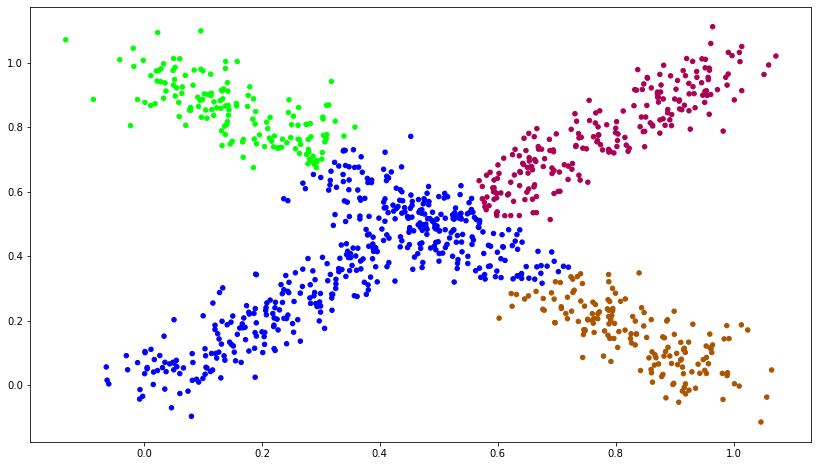

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=y_agg4, 
           cmap=plt.cm.brg, s=20)
plt.show()

#### ii. k=5

In [11]:
agg5 = AgglomerativeClustering(n_clusters=5)
y_agg5 = agg5.fit_predict(X)
np.unique(y_agg5, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([223, 301, 163, 155, 158], dtype=int64))

In [12]:
metrics.homogeneity_completeness_v_measure(fuzzyx['labels'], y_agg5)

(0.7273695325376266, 0.6360887027811332, 0.6786735822329185)

In [14]:
metrics.homogeneity_completeness_v_measure(fuzzyx['kmeans5'], y_agg5)

(0.8424525698118674, 0.8367657526450752, 0.8395995317809314)

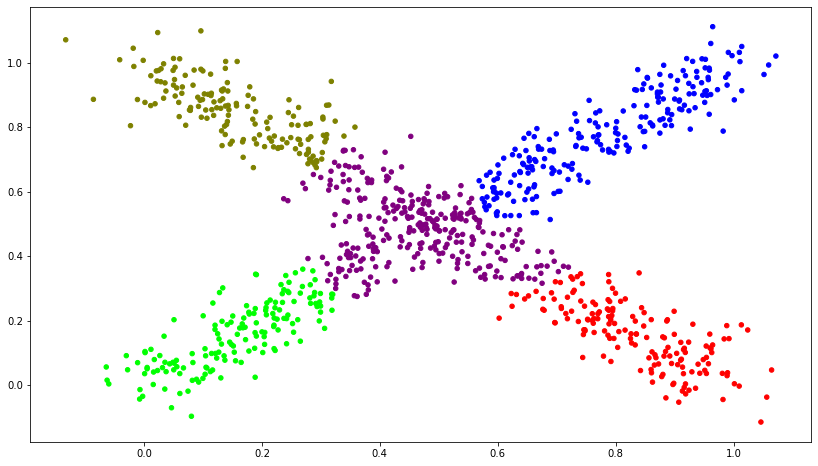

In [15]:
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=y_agg5, 
           cmap=plt.cm.brg, s=20)
plt.show()